# Backbone Summary

In [1]:
import networkx as nx
import pickle as pk
import configparser

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw
import numpy as np

In [13]:
config = configparser.ConfigParser()
config.read('networks.ini')
networks = list(config.keys())[1:]

In [14]:
Type = {'business-faculty': 'Social',
 'cs-faculty': 'Social',
 'history-faculty': 'Social',
 'caviar-proj': 'Social',
 'celegans-her': 'Biomedical',
 'celegans-male': 'Biomedical',
 'colombia-calls': 'Social',
 'colombia-mobility': 'Technological',
 'mobility-manizales': 'Technological',
 'mobility-medellin': 'Technological',
 'tennis-loss': 'Social',
 'yeast-grn': 'Biomedical',
 'bike-sharing': 'Technological',
 'giraffe': 'Social',
 'comorbidity': 'Biomedical',
 'phone-calls': 'Social',
 'us-airports': 'Technological',
 'DDI': 'Biomedical',
 'us-weblinks': 'Technological',
 'host-pathogen': 'Biomedical'}

## Backbone Sizes

In [15]:
df_wcc = pd.DataFrame(columns=['type', 'n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)
df_scc = pd.DataFrame(columns=['type', 'n_nodes', 'n_edges', 'density', 'tau_metric', 'tau_ultrametric', 'ultra_per_metric'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    rGstats = f'networks/{folder}/network-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_wcc['type'][network] = Type[network]   
    for col in data.T.columns:
        df_wcc[col][network] = data[network][col]    
    #break
    
    rGstats = f'networks/{folder}/network_lscc-stats.csv'
    data = pd.read_csv(rGstats, index_col=0)
    
    df_scc['type'][network] = Type[network]   
    for col in data.T.columns:
        df_scc[col][network] = data[network][col]    
    
#display(df)
df_wcc.to_csv('Summary/BackboneStats.csv')
df_scc.to_csv('Summary/BackboneStats_LSCC.csv')

### Comparison with Undirected

Here we consider only (for now) the metric and ultrametric case

In [16]:
df_compare = pd.DataFrame(columns=['n_nodes', 'nu_edges', 'nd_edges', 'metric', 'ultrametric', 'metric_avg', 
                                   'ultrametric_avg', 'metric_max', 'ultrametric_max'], index=networks)

for network in networks:
    folder = config[network].get('folder')
    
    data = pd.read_csv(f'networks/{folder}/undirected-stats.csv', index_col=0)
    
    df_compare['n_nodes'][network] = data['n_nodes']['mlscc']
    df_compare['nu_edges'][network] = data['n_edges']['max']
    df_compare['nd_edges'][network] = data['n_edges']['mlscc']
    
    for btype in ['metric', 'ultrametric']:
        df_compare[btype][network] = data[f'tau_{btype}']['mlscc']
        df_compare[f'{btype}_avg'][network] = data[f'tau_{btype}']['avg']
        df_compare[f'{btype}_max'][network] = data[f'tau_{btype}']['max']
            
    
    #break

#display(df_compare)
#df_wcc.to_csv('Summary/BackboneCompareStats_WCC.csv')
df_compare.drop(index='host-pathogen',axis=0,inplace=True) # Remove SSI which does not have an undirect representation
df_compare.to_csv('Summary/BackboneCompareStats.csv')

## Plotting

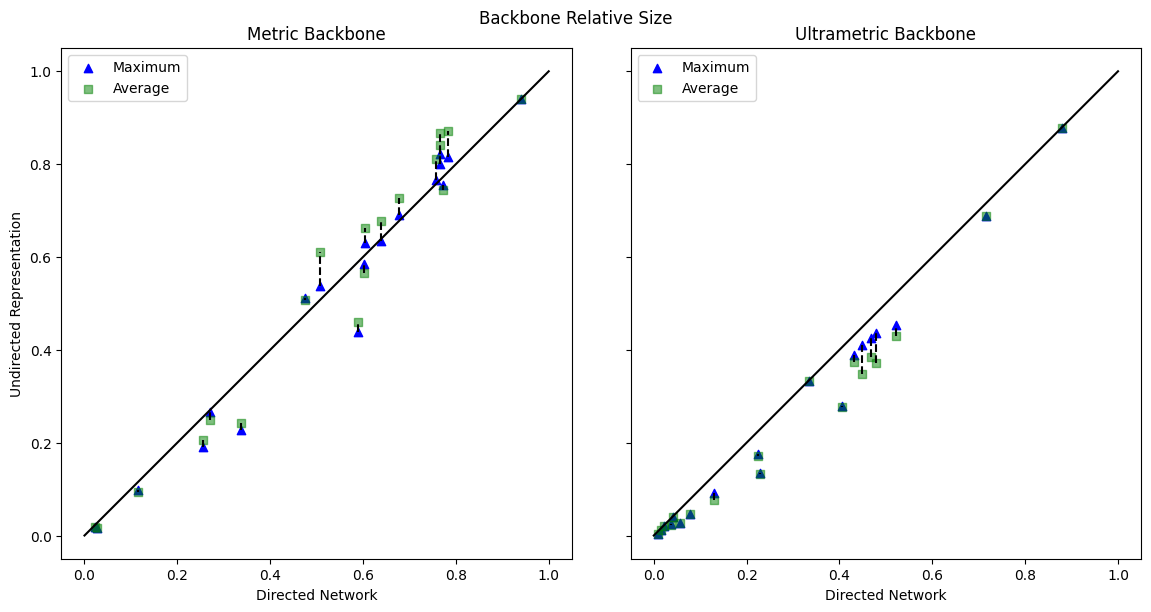

In [68]:
df = pd.read_csv('Summary/BackboneCompareStats.csv', index_col=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Same commands for both axis
for i, btype in enumerate(['metric', 'ultrametric']):
    ax[i].scatter(df[btype], df[f'{btype}_max'], marker='^', c='b', label='Maximum')
    ax[i].scatter(df[btype], df[f'{btype}_avg'], marker='s', c='g', label='Average', alpha=0.5)

    ax[i].vlines(df[btype], ymin=df[[f'{btype}_max', f'{btype}_avg']].min(axis=1), ymax=df[[f'{btype}_max', f'{btype}_avg']].max(axis=1), linestyle='--', color='k')
    ax[i].plot([0, 1], [0, 1], 'k-')
    
    ax[i].legend()
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network')
    ax[i].set_title(btype.capitalize() + ' Backbone')
    
# Labels
ax[0].set_ylabel('Undirected Representation')
fig.suptitle('Backbone Relative Size')

plt.tight_layout()
plt.show()

In [69]:
display(df)

,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max
business-faculty,84,488,976,0.604508,0.224385,0.661885,0.172131,0.629098,0.176230
cs-faculty,78,179,358,0.782123,0.522346,0.871508,0.430168,0.815642,0.452514
history-faculty,56,158,316,0.756329,0.449367,0.810127,0.348101,0.765823,0.411392
caviar-proj,63,90,180,0.772222,0.716667,0.744444,0.688889,0.755556,0.688889
celegans-her,215,558,1116,0.765233,0.466846,0.840502,0.383513,0.820789,0.424731
celegans-male,238,634,1268,0.677445,0.431388,0.727129,0.373817,0.690852,0.389590
colombia-calls,863,199898,399796,0.027959,0.009622,0.015118,0.004312,0.015703,0.004317
colombia-mobility,863,67150,134300,0.022115,0.015748,0.018094,0.012837,0.018183,0.012837
mobility-manizales,57,1237,2474,0.271221,0.078011,0.249798,0.045271,0.265158,0.045271
mobility-medellin,413,15503,31006,0.256273,0.057311,0.205380,0.026640,0.189770,0.027156


In [70]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

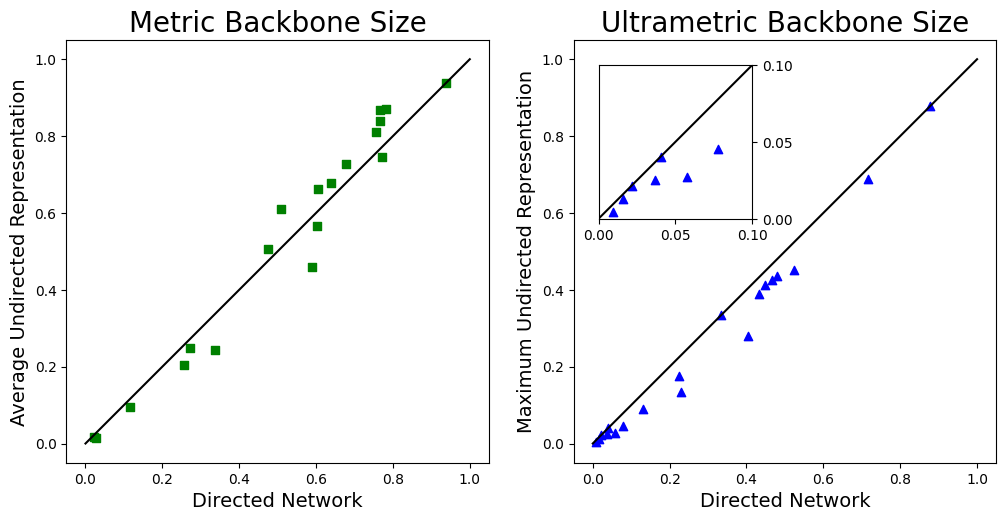

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Same commands for both axis

ax[0].scatter(df['metric'], df[f'metric_avg'], marker='s', c='g', label='Average')
ax[1].scatter(df['ultrametric'], df[f'ultrametric_max'], marker='^', c='b', label='Maximum')

for i in range(2):
    ax[i].plot([0, 1], [0, 1], 'k-')
    #ax[i].legend(fontsize=12, loc=4)
    ax[i].set_aspect('equal')
    ax[i].set_xlabel('Directed Network', fontsize=14)

ax[0].set_title('Metric Backbone Size', fontsize=20)    
ax[0].set_ylabel('Average Undirected Representation', fontsize=14)

ax[1].set_title('Ultrametric Backbone Size', fontsize=20)    
ax[1].set_ylabel('Maximum Undirected Representation', fontsize=14)

# Add Ultrametric inset
axes = zoomed_inset_axes(ax[1], 4.0, loc=2, borderpad=1.8)
axes.scatter(df['ultrametric'], df['ultrametric_max'], marker='^', c='b', label='Maximum')
axes.plot([0, 0.1], [0, 0.1], 'k-')

axes.yaxis.tick_right()
axes.set_xlim((0, 0.1))
axes.set_ylim((0, 0.1))
axes.set_aspect('equal')
axes.set_yticks([0.0, 0.05, 0.10])

#plt.tight_layout()
plt.draw()
plt.show()

In [73]:
df_dir = df[df['metric'] > df['metric_avg']]
df_undir = df[df['metric'] < df['metric_avg']]

In [74]:
display(df_dir)

,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max
caviar-proj,63,90,180,0.772222,0.716667,0.744444,0.688889,0.755556,0.688889
colombia-calls,863,199898,399796,0.027959,0.009622,0.015118,0.004312,0.015703,0.004317
colombia-mobility,863,67150,134300,0.022115,0.015748,0.018094,0.012837,0.018183,0.012837
mobility-manizales,57,1237,2474,0.271221,0.078011,0.249798,0.045271,0.265158,0.045271
mobility-medellin,413,15503,31006,0.256273,0.057311,0.205380,0.026640,0.189770,0.027156
yeast-grn,1225,52478,104956,0.116306,0.036692,0.093925,0.023324,0.098384,0.025192
us-airports,926,6930,13860,0.336652,0.228571,0.243146,0.133478,0.226840,0.133622
DDI,412,1483,2966,0.590020,0.404922,0.459879,0.277141,0.438975,0.278490
us-weblinks,18112,49855,99710,0.601785,0.479711,0.565801,0.371858,0.585017,0.436546


In [75]:
display(df_undir)

,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max
business-faculty,84,488,976,0.604508,0.224385,0.661885,0.172131,0.629098,0.176230
cs-faculty,78,179,358,0.782123,0.522346,0.871508,0.430168,0.815642,0.452514
history-faculty,56,158,316,0.756329,0.449367,0.810127,0.348101,0.765823,0.411392
celegans-her,215,558,1116,0.765233,0.466846,0.840502,0.383513,0.820789,0.424731
celegans-male,238,634,1268,0.677445,0.431388,0.727129,0.373817,0.690852,0.389590
tennis-loss,1263,16349,32698,0.507799,0.130130,0.611414,0.077558,0.537648,0.091076
bike-sharing,723,18055,36110,0.639684,0.040570,0.676765,0.039989,0.635392,0.040044
giraffe,6,15,30,0.766667,0.333333,0.866667,0.333333,0.800000,0.333333
comorbidity,95,4465,8930,0.474356,0.021725,0.506831,0.021053,0.511758,0.021053


## Investigar Direcionalidade

In [5]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

    missing_one = 0.0
    missing_both = 0.0
    not_missing = 0.0

    equal_reverse_missing = 0.0
    equal_reverse_missing_one = 0.0
    equal_reverse = 0.0

    for u, v in Bu.edges():
        if (not Bd.has_edge(u, v)) and (not Bd.has_edge(v, u)):
            missing_both += 1
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            equal_reverse_missing += int(not (path1 == path2))
        elif (not Bd.has_edge(u, v)):
            missing_one += 1
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            equal_reverse_missing_one += int(not (path1 == path2))
        elif (not Bd.has_edge(v, u)):
            missing_one += 1
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            equal_reverse_missing_one += int(not (path1 == path2))
        else:
            not_missing += 1
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            equal_reverse += int(path1 == path2)
            
    
    print(network, equal_reverse_missing/missing_both, equal_reverse/not_missing, equal_reverse_missing_one/missing_one)
    #print(J2)
    #break

NameError: name 'df_undir' is not defined

In [35]:
def zero_ratio(num, den):
    if den == 0.0:
        return 0.0
    else:
        return num/den

In [40]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    #D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

    missing = 0.0
    present = 0.0

    equal_reverse_missing = 0.0
    equal_reverse = 0.0

    missing_double = 0.0
    present_double = 0.0

    equal_reverse_missing_double = 0.0
    equal_reverse_double = 0.0

    for u, v in Bd.edges():
        if Bd.has_edge(v, u):
            if (not Bu.has_edge(u, v)):
                missing_double += 1
                path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
                path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
                path2.reverse()
                equal_reverse_missing_double += int((path1 == path2))
            else:
                present_double += 1
                path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
                path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
                path2.reverse()
                equal_reverse_double += int(path1 == path2)
        else:
            if (not Bu.has_edge(u, v)):
                missing += 1
                path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
                path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
                path2.reverse()
                equal_reverse_missing += int(not (path1 == path2))
            else:
                present += 1
                path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
                path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
                path2.reverse()
                equal_reverse += int(not (path1 == path2))
    
    #print(present, missing, present_double, missing_double)
            
    
    print(network, zero_ratio(equal_reverse_missing, missing), zero_ratio(equal_reverse, present),
           zero_ratio(equal_reverse_missing_double, missing_double), zero_ratio(equal_reverse_double, present_double), missing_double)
    #break

caviar-proj 1.0 1.0 0.0 1.0 0.0
colombia-calls 1.0 1.0 0.0 1.0 0.0
colombia-mobility 1.0 1.0 0.0 1.0 0.0
mobility-manizales 1.0 1.0 0.0 1.0 0.0
mobility-medellin 1.0 1.0 0.0 1.0 0.0
yeast-grn 1.0 1.0 0.0 1.0 0.0
us-airports 1.0 1.0 0.0 1.0 0.0
DDI 1.0 1.0 0.0 1.0 0.0
us-weblinks 1.0 1.0 0.0 1.0 0.0


##### Including Non-Reciprocal Paths

In [29]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    #D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

    present = 0.0
    not_equal_reverse = 0.0

    edges = Bd.to_undirected()
    nx.set_edge_attributes(edges, values=False, name='considered')

    for u, v in Bd.edges():
        if not edges[u][v]['considered']:
            edges[u][v]['considered'] = True
            edges[v][u]['considered'] = True
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                not_equal_reverse += 1
                if Bu.has_edge(u, v):
                    present += 1
    
    print(network, present/not_equal_reverse)

business-faculty 0.587378640776699
cs-faculty 0.7708333333333334
history-faculty 0.6363636363636364
celegans-her 0.6964285714285714
celegans-male 0.6157635467980296
tennis-loss 0.6410800113090189
bike-sharing 0.563247726910193
giraffe 0.6666666666666666
comorbidity 0.5804066543438078


In [30]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    #D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

    present = 0.0
    not_equal_reverse = 0.0

    edges = Bd.to_undirected()
    nx.set_edge_attributes(edges, values=False, name='considered')

    for u, v in Bd.edges():
        if not edges[u][v]['considered']:
            edges[u][v]['considered'] = True
            edges[v][u]['considered'] = True
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                not_equal_reverse += 1
                if Bu.has_edge(u, v):
                    present += 1
    
    print(network, present/not_equal_reverse)

caviar-proj 0.3333333333333333
colombia-calls 0.1254232505643341
colombia-mobility 0.15586034912718205
mobility-manizales 0.3526570048309179
mobility-medellin 0.2838919459729865
yeast-grn 0.2636336245857186
us-airports 0.16666666666666666
DDI 0.21075581395348839
us-weblinks 0.31599340478153337


#### Ratio of Non-Reciprocal Paths

In [41]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    #D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

    present = 0.0
    not_equal_reverse = 0.0

    nodes = list(Bd.nodes())

    for i, u in enumerate(nodes):
        for v in nodes[i:]:
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                not_equal_reverse += 1
                if Bu.has_edge(u, v):
                    present += 1

    print(network, present/not_equal_reverse)
    #break

caviar-proj 0.007704160246533128
colombia-calls 0.002670303600126819
colombia-mobility 0.00036706193539709936
mobility-manizales 0.08378672470076169
mobility-medellin 0.01719580479208709
yeast-grn 0.005093917428723321
us-airports 0.0008583386715753173
DDI 0.0020413129292164603


KeyboardInterrupt: 

In [ ]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    #D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml')

    present = 0.0
    not_equal_reverse = 0.0

    for u, v in Bu.edges():
        path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
        path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
        path2.reverse()
        if not (path1 == path2):
            not_equal_reverse += 1
    
    print(network, not_equal_reverse/Bu.number_of_edges())

business-faculty 0.4055727554179567
cs-faculty 0.2564102564102564
history-faculty 0.28125
celegans-her 0.26865671641791045
celegans-male 0.2885032537960954
tennis-loss 0.5233093237294918
bike-sharing 0.311318438497422
giraffe 0.23076923076923078
comorbidity 0.3031374281926646


##### Edge Matching

In [22]:
df_edge_match = pd.DataFrame(columns=['directed', 'undirected', 'both'], index=df.index)
df_edge_match.fillna(0, inplace=True)
#display(df_edge_match)

In [23]:
df_edge_match = pd.DataFrame(columns=['directed', 'undirected', 'both'], index=df.index)
df_edge_match.fillna(0, inplace=True)

for network in df.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    nodes = Bu.nodes()

    for u in nodes:
        for v in nodes:
            if Bu.has_edge(u, v) and Bd.has_edge(u, v):
                df_edge_match['both'][network] += 1
            elif Bu.has_edge(u, v):
                df_edge_match['undirected'][network] += 1
            elif Bd.has_edge(u, v):
                df_edge_match['directed'][network] += 1

In [17]:
display(df_edge_match)

,directed,undirected,both
business-faculty,85,141,505
cs-faculty,11,43,269
history-faculty,20,37,219
caviar-proj,10,5,129
celegans-her,51,135,803
celegans-male,78,141,781
colombia-calls,6199,1065,4979
colombia-mobility,677,137,2293
mobility-manizales,134,81,537
mobility-medellin,2863,1285,5083


In [18]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

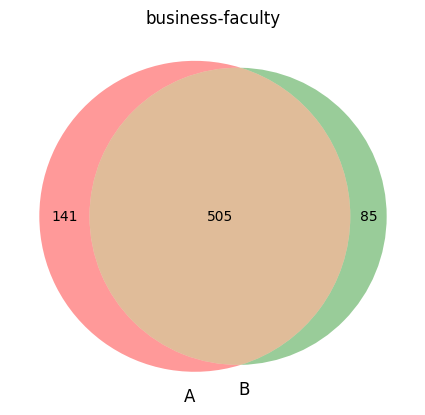

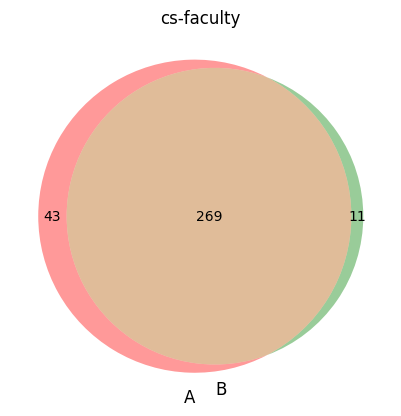

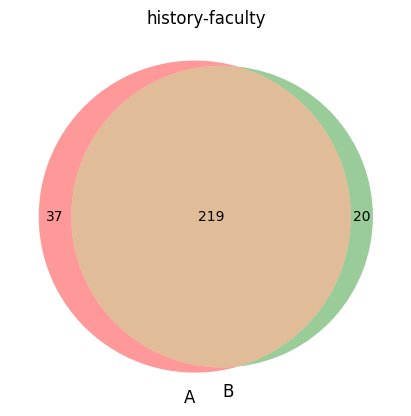

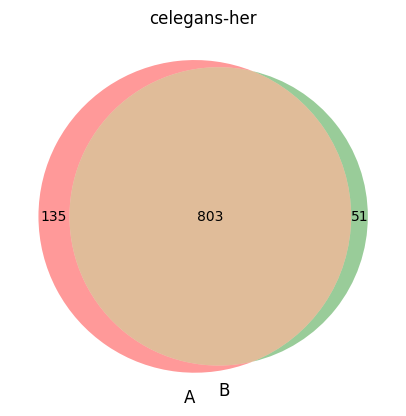

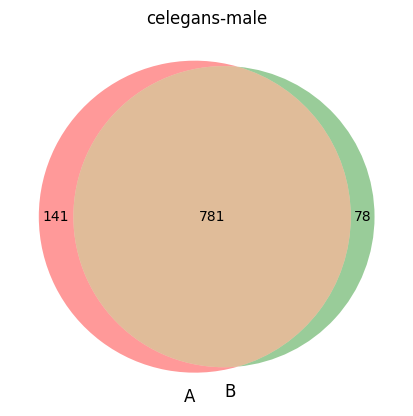

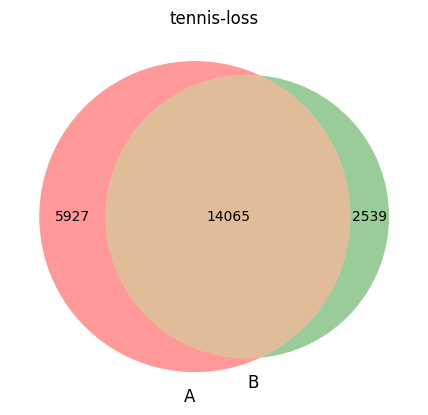

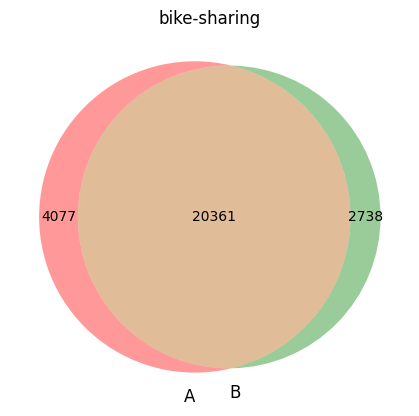

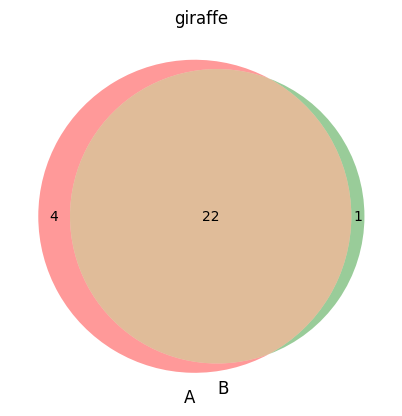

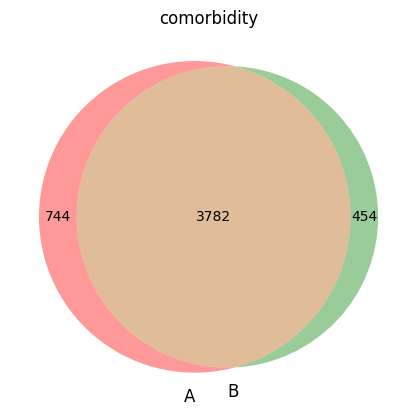

<Figure size 640x480 with 0 Axes>

In [19]:
for network in df_undir.index:
    venn2((df_edge_match['undirected'][network], df_edge_match['directed'][network], df_edge_match['both'][network]))
    plt.title(network)
    plt.show()
    plt.clf()

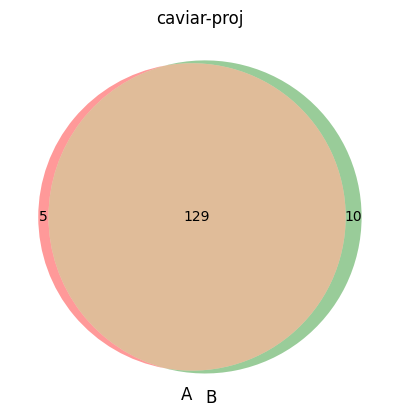

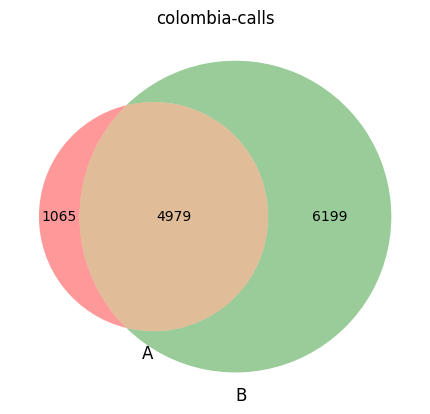

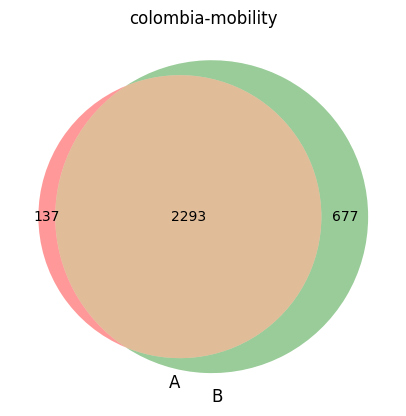

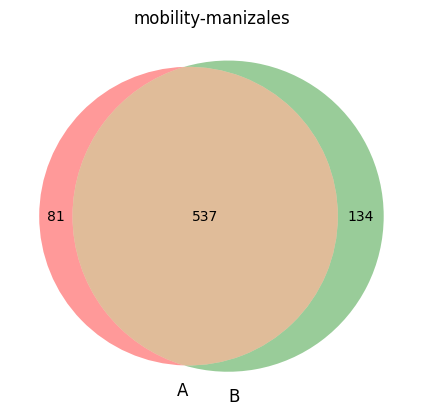

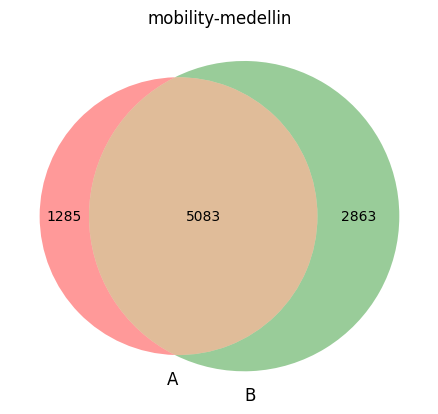

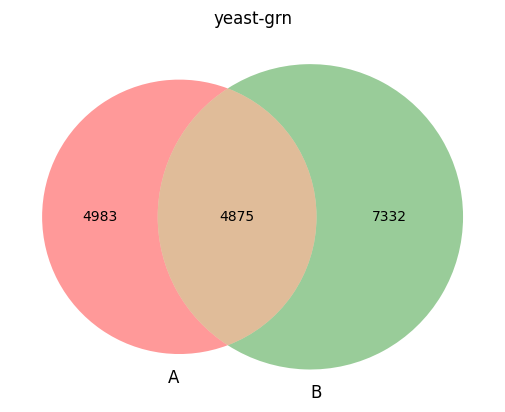

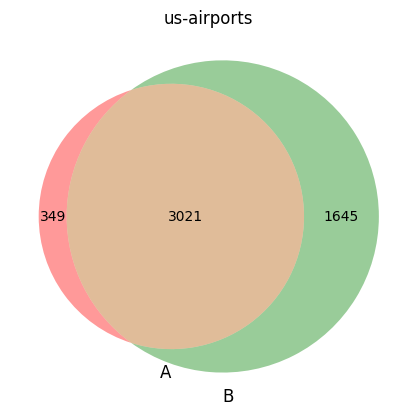

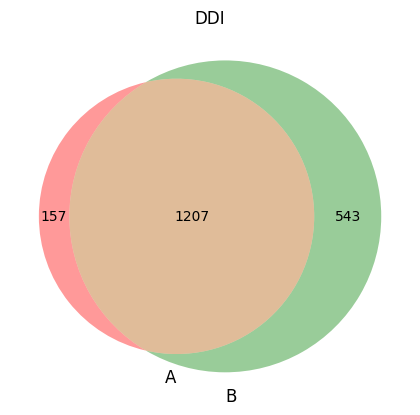

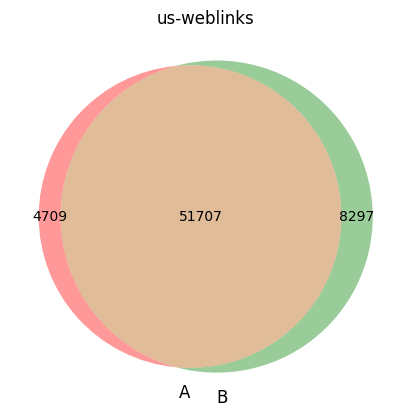

<Figure size 640x480 with 0 Axes>

In [20]:
for network in df_dir.index:
    venn2((df_edge_match['undirected'][network], df_edge_match['directed'][network], df_edge_match['both'][network]))
    plt.title(network)
    plt.show()
    plt.clf()

#### Estimation of Non-Reciprocal Path Length

In [26]:
#print('network', 'duv', 'dvu', 'd')
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    missing_one = 0.0
    missing_both = 0.0
    not_missing = 0.0

    equal_reverse_missing = 0.0
    equal_reverse_missing_one = 0.0
    equal_reverse = 0.0

    for u, v in Bu.edges():
        duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
        dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
        davg = 0.5*(duv+dvu)
        if (not Bd.has_edge(u, v)) and (not Bd.has_edge(v, u)):
            missing_both += 1
            equal_reverse_missing += int(davg < Bu[u][v]['avg_distance'])
        elif (not Bd.has_edge(u, v)):
            missing_one += 1
            equal_reverse_missing_one += int(davg < Bu[u][v]['avg_distance'])
        elif (not Bd.has_edge(v, u)):
            missing_one += 1
            equal_reverse_missing_one += int(davg < Bu[u][v]['avg_distance'])
        else:
            not_missing += 1
            equal_reverse += int(davg == Bu[u][v]['avg_distance'])
    
    print(network, equal_reverse/not_missing, equal_reverse_missing/missing_both, equal_reverse_missing_one/missing_one)
    #break

business-faculty 1.0 1.0 1.0
cs-faculty 1.0 1.0 1.0
history-faculty 1.0 1.0 1.0
celegans-her 1.0 1.0 1.0
celegans-male 1.0 1.0 1.0
tennis-loss 1.0 1.0 1.0
bike-sharing 1.0 1.0 1.0
giraffe 1.0 1.0 1.0
comorbidity 1.0 1.0 1.0


In [44]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')

    missing_one = 0.0
    missing_both = 0.0
    not_missing = 0.0

    equal_reverse_missing_both = 0.0
    equal_reverse_missing_one = 0.0
    equal_reverse = 0.0

    for u, v in Bd.edges():
        if Bd.has_edge(v, u):
            davg = 0.5*(Bd[u][v]['distance'] + Bd[v][u]['distance'])
            not_missing += 1
            equal_reverse += int(davg == Bu[u][v]['avg_distance'])
        else:
            dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
            davg = 0.5*(Bd[u][v]['distance']+dvu)
            if (not Bu.has_edge(u, v)):
                missing_both += 1
                d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
                equal_reverse_missing_both += int(davg <= d)
            else:
                missing_one += 1
                equal_reverse_missing_one += int(davg < Bu[u][v]['avg_distance'])
                    
    print(network, equal_reverse/not_missing, equal_reverse_missing_both/missing_both, equal_reverse_missing_one/missing_one)
    #break

caviar-proj 1.0 1.0 1.0
colombia-calls 1.0 1.0 1.0
colombia-mobility 1.0 1.0 1.0
mobility-manizales 1.0 1.0 1.0
mobility-medellin 1.0 1.0 1.0
yeast-grn 1.0 1.0 1.0
us-airports 1.0 1.0 1.0
DDI 1.0 1.0 1.0
us-weblinks 1.0 1.0 1.0


## Number of pair of nodes the have irreversible paths

In [55]:
import pickle as pk

In [51]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')        
    #D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
    
    #pair_set = set()
    
    should_not = 0
    for u, v in Bu.edges():
        if (not Bd.has_edge(u, v)) and (not Bd.has_edge(v, u)):
            #pair_set.add(frozenset([u, v]))
            should_not += 2
        elif (not Bd.has_edge(u, v)):
            #pair_set.add(frozenset([u, v]))
            should_not += 0
        elif (not Bd.has_edge(v, u)):
            #pair_set.add(frozenset([u, v]))
            should_not += 0
    
    print(network, 0.5*should_not/Bd.number_of_edges())
    #break    
        

caviar-proj 0.0
colombia-calls 0.007872606906423331
colombia-mobility 0.00202020202020202
mobility-manizales 0.005961251862891207
mobility-medellin 0.009438711301283665
yeast-grn 0.09658392725485378
us-airports 0.0021431633090441492
DDI 0.0034285714285714284
us-weblinks 0.007299513365775615


In [47]:
df_dir

,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max
caviar-proj,63,90,180,0.772222,0.716667,0.744444,0.688889,0.755556,0.688889
colombia-calls,863,199898,399796,0.027959,0.009622,0.015118,0.004312,0.015703,0.004317
colombia-mobility,863,67150,134300,0.022115,0.015748,0.018094,0.012837,0.018183,0.012837
mobility-manizales,57,1237,2474,0.271221,0.078011,0.249798,0.045271,0.265158,0.045271
mobility-medellin,413,15503,31006,0.256273,0.057311,0.205380,0.026640,0.189770,0.027156
yeast-grn,1225,52478,104956,0.116306,0.036692,0.093925,0.023324,0.098384,0.025192
us-airports,926,6930,13860,0.336652,0.228571,0.243146,0.133478,0.226840,0.133622
DDI,412,1483,2966,0.590020,0.404922,0.459879,0.277141,0.438975,0.278490
us-weblinks,18112,49855,99710,0.601785,0.479711,0.565801,0.371858,0.585017,0.436546


In [50]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')        
    #D = nx.read_graphml(f'networks/{folder}/undirected_scc_network.graphml')
    
    #pair_set = set()
    should_not = 0

    for u, v in Bu.edges():
        if (not Bd.has_edge(u, v)) and (not Bd.has_edge(v, u)):
            #pair_set.add(frozenset([u, v]))
            should_not += 2
        elif (not Bd.has_edge(u, v)):
            #pair_set.add(frozenset([u, v]))
            should_not += 1
        elif (not Bd.has_edge(v, u)):
            #pair_set.add(frozenset([u, v]))
            should_not += 1
    
    print(network, 0.5*should_not/Bd.number_of_edges())
    
    #print(network, equal_reverse/not_missing, equal_reverse_missing/missing_both, equal_reverse_missing_one/missing_one)
    #break

business-faculty 0.11949152542372882
cs-faculty 0.07678571428571429
history-faculty 0.07740585774058577
celegans-her 0.07903981264637003
celegans-male 0.08207217694994179
tennis-loss 0.17848108889424236
bike-sharing 0.08825057361790553
giraffe 0.08695652173913043
comorbidity 0.08781869688385269


In [53]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    N = list(Bu.nodes())
    jensen = 0
    
    for idx, u in enumerate(N):
        for v in N[idx:]:
            duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
            dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
            davg = 0.5*(duv+dvu)
            
            d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
            jensen += int(d <= davg)
    
    print(network, 0.5*jensen/(len(N)*(len(N)-1)))
            

business-faculty 0.04661503155479059
cs-faculty 0.07900432900432901
history-faculty 0.08327922077922079
celegans-her 0.023788306889806564
celegans-male 0.02949154345282417
tennis-loss 0.00903158655529247
bike-sharing 0.03852541924805462
giraffe 0.26666666666666666
comorbidity 0.13017917133258677


In [61]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    jensen_gap = 0.0
    single_unreciprocal = 0
    double_unreciprocal = 0
    double_semi_metric = 0
    
    for (u, v) in svals['metric'].keys():
        if Bd.has_edge(v, u):
            duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
            dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
            davg = 0.5*(duv+dvu)
            
            d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
            jensen_gap += (davg - d)
            single_unreciprocal += 1
        else:
            double_semi_metric += 0.5
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
                dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
                davg = 0.5*(duv+dvu)
                
                d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
                jensen_gap += 0.5*(davg - d) # Divide by half to avoid double counting
                double_unreciprocal += 0.5
    
    print(network, jensen_gap/(double_unreciprocal + single_unreciprocal), double_unreciprocal/double_semi_metric)
    #break
    '''
    N = list(Bu.nodes())
    jensen = 0
    
    for idx, u in enumerate(N):
        for v in N[idx:]:
            duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
            dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
            davg = 0.5*(duv+dvu)
            
            d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
            jensen += int(d <= davg)
    
    print(network, 0.5*jensen/(len(N)*(len(N)-1)))
    '''
            

caviar-proj -3.636328742076935 0.38461538461538464
colombia-calls -52.18071776319451 0.9809398998768117
colombia-mobility -13.619000347425633 0.8784322137778867
mobility-manizales -3.841119583600063 0.5789473684210527
mobility-medellin -17.702538698346455 0.7530164725632148
yeast-grn -1.954878602817454 0.9956275968692627
us-airports -21.08387977805255 0.7002770083102493
DDI -67.65833478218026 0.8371212121212122
us-weblinks -120.01117839568447 0.5650565709312445


In [62]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    jensen_gap = 0.0
    single_unreciprocal = 0
    double_unreciprocal = 0
    double_semi_metric = 0
    
    for (u, v) in svals['metric'].keys():
        if Bd.has_edge(v, u):
            duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
            dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
            davg = 0.5*(duv+dvu)
            
            d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
            jensen_gap += (davg - d)
            single_unreciprocal += 1
        else:
            double_semi_metric += 0.5
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
                dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
                davg = 0.5*(duv+dvu)
                
                d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
                jensen_gap += 0.5*(davg - d) # Divide by half to avoid double counting
                double_unreciprocal += 0.5
    
    print(network, jensen_gap/(double_unreciprocal + single_unreciprocal), double_unreciprocal/double_semi_metric)
    #break

business-faculty -20.279779786961193 0.9444444444444444
cs-faculty -14.819471857297314 0.8666666666666667
history-faculty -19.108610481229523 0.7272727272727273
celegans-her -10.097384161684364 0.6808510638297872
celegans-male -9.79671567388949 0.7766990291262136
tennis-loss -27.42136638646418 0.9394678492239468
bike-sharing -112.2365403187455 0.7665381192524473
giraffe -0.3891071295663936 1.0
comorbidity -0.05908708831069257 0.6384274640088593


In [66]:
df_undir['density'] = df_undir['nd_edges']/(df_undir['n_nodes']*(df_undir['n_nodes']-1))
df_undir

/tmp/ipykernel_334702/3259574027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_undir['density'] = df_undir['nd_edges']/(df_undir['n_nodes']*(df_undir['n_nodes']-1))


,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max,density
business-faculty,84,488,976,0.604508,0.224385,0.661885,0.172131,0.629098,0.176230,0.139989
cs-faculty,78,179,358,0.782123,0.522346,0.871508,0.430168,0.815642,0.452514,0.059607
history-faculty,56,158,316,0.756329,0.449367,0.810127,0.348101,0.765823,0.411392,0.102597
celegans-her,215,558,1116,0.765233,0.466846,0.840502,0.383513,0.820789,0.424731,0.024256
celegans-male,238,634,1268,0.677445,0.431388,0.727129,0.373817,0.690852,0.389590,0.022480
tennis-loss,1263,16349,32698,0.507799,0.130130,0.611414,0.077558,0.537648,0.091076,0.020514
bike-sharing,723,18055,36110,0.639684,0.040570,0.676765,0.039989,0.635392,0.040044,0.069175
giraffe,6,15,30,0.766667,0.333333,0.866667,0.333333,0.800000,0.333333,1.000000
comorbidity,95,4465,8930,0.474356,0.021725,0.506831,0.021053,0.511758,0.021053,1.000000


In [67]:
df_dir['density'] = df_dir['nd_edges']/(df_dir['n_nodes']*(df_dir['n_nodes']-1))
df_dir

/tmp/ipykernel_334702/2931911502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dir['density'] = df_dir['nd_edges']/(df_dir['n_nodes']*(df_dir['n_nodes']-1))


,n_nodes,nu_edges,nd_edges,metric,ultrametric,metric_avg,ultrametric_avg,metric_max,ultrametric_max,density
caviar-proj,63,90,180,0.772222,0.716667,0.744444,0.688889,0.755556,0.688889,0.046083
colombia-calls,863,199898,399796,0.027959,0.009622,0.015118,0.004312,0.015703,0.004317,0.537428
colombia-mobility,863,67150,134300,0.022115,0.015748,0.018094,0.012837,0.018183,0.012837,0.180534
mobility-manizales,57,1237,2474,0.271221,0.078011,0.249798,0.045271,0.265158,0.045271,0.775063
mobility-medellin,413,15503,31006,0.256273,0.057311,0.205380,0.026640,0.189770,0.027156,0.182221
yeast-grn,1225,52478,104956,0.116306,0.036692,0.093925,0.023324,0.098384,0.025192,0.069999
us-airports,926,6930,13860,0.336652,0.228571,0.243146,0.133478,0.226840,0.133622,0.016181
DDI,412,1483,2966,0.590020,0.404922,0.459879,0.277141,0.438975,0.278490,0.017516
us-weblinks,18112,49855,99710,0.601785,0.479711,0.565801,0.371858,0.585017,0.436546,0.000304


In [76]:
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    print(network, len(svals['metric']))

business-faculty 386
cs-faculty 78
history-faculty 77
celegans-her 262
celegans-male 409
tennis-loss 16094
bike-sharing 13011
giraffe 7
comorbidity 4694


In [77]:
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    print(network, len(svals['metric']))

caviar-proj 41
colombia-calls 388618
colombia-mobility 131330
mobility-manizales 1803
mobility-medellin 23060
yeast-grn 92749
us-airports 9194
DDI 1216
us-weblinks 39706


In [79]:
for network in ['mobility-manizales', 'celegans-male']:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    jensen_gap = 0.0
    single_unreciprocal = 0
    double_unreciprocal = 0
    double_semi_metric = 0
    
    for (u, v) in svals['metric'].keys():
        if Bd.has_edge(v, u):
            duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
            dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
            davg = 0.5*(duv+dvu)
            
            d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
            jensen_gap += (davg - d)
            single_unreciprocal += 1
        else:
            double_semi_metric += 0.5
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                duv = nx.shortest_path_length(Bd, source=u, target=v, weight='distance')
                dvu = nx.shortest_path_length(Bd, source=v, target=u, weight='distance')
                davg = 0.5*(duv+dvu)
                
                d = nx.shortest_path_length(Bu, source=u, target=v, weight='avg_distance')
                jensen_gap += 0.5*(davg - d) # Divide by half to avoid double counting
                double_unreciprocal += 0.5
    
    print(network, jensen_gap/(double_unreciprocal + single_unreciprocal), double_unreciprocal/double_semi_metric)
    #break

mobility-manizales -3.841119583600063 0.5789473684210527
celegans-male -9.79671567388949 0.7766990291262136


### Where are the reversible paths?

In [86]:
print('Network', 'Partial', 'Complete', 'Partial_Und', 'Complete_Und')
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    partial = 0
    complete = 0
    partial_undirected = 0
    complete_undirected = 0
    
    for (u, v) in svals['metric'].keys():
        if Bd.has_edge(v, u):
            partial += 1
            partial_undirected += int(Bu.has_edge(u, v))
        else:
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                complete += 0.5
                complete_undirected += 0.5*int(Bu.has_edge(u, v))
    
    print(network, partial, complete, partial_undirected, complete_undirected)
    #break

Network Partial Complete Partial_Und Complete_Und
business-faculty 206 85.0 121 10.0
cs-faculty 48 13.0 37 3.0
history-faculty 55 8.0 35 1.0
celegans-her 168 32.0 117 9.0
celegans-male 203 80.0 125 8.0
tennis-loss 7074 4237.0 4535 696.0
bike-sharing 6269 2584.0 3531 273.0
giraffe 3 2.0 2 1.0
comorbidity 1082 1153.0 628 58.0


In [87]:
print('Network', 'Partial', 'Complete', 'Partial_Und', 'Complete_Und')
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    partial = 0
    complete = 0
    partial_undirected = 0
    complete_undirected = 0
    
    for (u, v) in svals['metric'].keys():
        if Bd.has_edge(v, u):
            partial += 1
            partial_undirected += int(Bu.has_edge(u, v))
        else:
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                complete += 0.5
                complete_undirected += 0.5*int(Bu.has_edge(u, v))
    
    print(network, partial, complete, partial_undirected, complete_undirected)
    #break

Network Partial Complete Partial_Und Complete_Und
caviar-proj 15 5.0 5 0.0
colombia-calls 7088 187129.0 889 88.0
colombia-mobility 802 57330.0 125 6.0
mobility-manizales 207 462.0 73 4.0
mobility-medellin 3998 7177.0 1135 75.0
yeast-grn 9957 41215.0 2625 1179.0
us-airports 1974 2528.0 329 10.0
DDI 688 221.0 145 6.0
us-weblinks 12130 7791.0 3833 438.0


##### Inclusion of non-reciprocal paths
Relative difference of both-way distances

In [92]:
print('Network', 'Partial', 'Complete', 'Partial_Und', 'Complete_Und', 'Relative_Diff', 'Relative_Diff_Und')
for network in df_undir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml') 
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    partial = 0
    complete = 0
    partial_undirected = 0
    complete_undirected = 0
    
    relative_difference_undirected = 0
    relative_difference = 0
    
    for (u, v) in svals['metric'].keys():
        max_d = max(D[u][v]['distance'], D[v][u]['distance'])
        min_d = min(D[u][v]['distance'], D[v][u]['distance'])
        
        if Bd.has_edge(v, u):
            partial += 1
            
            if Bu.has_edge(u, v):
                partial_undirected += 1
                relative_difference_undirected += (max_d-min_d)/max_d
            else:
                relative_difference += (max_d-min_d)/max_d
                
        else:
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                complete += 0.5
                if Bu.has_edge(u, v):
                    complete_undirected += 0.5
                    relative_difference_undirected += 0.5*(max_d-min_d)/max_d
                else:
                    relative_difference += 0.5*(max_d-min_d)/max_d
    
    print(network, partial, complete, partial_undirected, complete_undirected, relative_difference, relative_difference_undirected)
    #break

Network Partial Complete Partial_Und Complete_Und Relative_Diff Relative_Diff_Und
business-faculty 206 85.0 121 10.0 89.60989895726802 67.8211833660939
cs-faculty 48 13.0 37 3.0 11.080406940293162 22.37025461330242
history-faculty 55 8.0 35 1.0 17.01881323118607 20.187779474301987
celegans-her 168 32.0 117 9.0 45.72316214574209 78.68444428196293
celegans-male 203 80.0 125 8.0 84.52498981220577 80.79353826923379
tennis-loss 7074 4237.0 4535 696.0 3125.480330402243 2737.5926202255196
bike-sharing 6269 2584.0 3531 273.0 2158.286927251812 1027.1379176967175
giraffe 3 2.0 2 1.0 0.3410992008009251 0.6297587699842621
comorbidity 1082 1153.0 628 58.0 454.47360924401346 152.76555257517032


In [93]:
print('Network', 'Partial', 'Complete', 'Partial_Und', 'Complete_Und', 'Relative_Diff', 'Relative_Diff_Und')
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml') 
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    partial = 0
    complete = 0
    partial_undirected = 0
    complete_undirected = 0
    
    relative_difference_undirected = 0
    relative_difference = 0
    
    for (u, v) in svals['metric'].keys():
        max_d = max(D[u][v]['distance'], D[v][u]['distance'])
        min_d = min(D[u][v]['distance'], D[v][u]['distance'])
        
        if Bd.has_edge(v, u):
            partial += 1
            
            if Bu.has_edge(u, v):
                partial_undirected += 1
                relative_difference_undirected += (max_d-min_d)/max_d
            else:
                relative_difference += (max_d-min_d)/max_d
                
        else:
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                complete += 0.5
                if Bu.has_edge(u, v):
                    complete_undirected += 0.5
                    relative_difference_undirected += 0.5*(max_d-min_d)/max_d
                else:
                    relative_difference += 0.5*(max_d-min_d)/max_d
    
    print(network, partial, complete, partial_undirected, complete_undirected, relative_difference, relative_difference_undirected)
    #break

Network Partial Complete Partial_Und Complete_Und Relative_Diff Relative_Diff_Und
caviar-proj 15 5.0 5 0 10.669599243605669 3.7338460504008073
colombia-calls 7088 187129.0 889 88.0 141090.03763720882 597.8599892627108
colombia-mobility 802 57330.0 125 6.0 41131.699455356305 86.44469168282912
mobility-manizales 207 462.0 73 4.0 272.3796312709776 37.05742394929974
mobility-medellin 3998 7177.0 1135 75.0 5924.548415208442 681.0719481306091
yeast-grn 9957 41215.0 2625 1179.0 36067.07405321183 2130.2339679991946
us-airports 1974 2528.0 329 10.0 3314.769912252086 250.13193673055358
DDI 688 221.0 145 6.0 661.0644098602232 109.68998251966586
us-weblinks 12130 7791.0 3833 438.0 13134.267329169716 3029.7291585558914


Distortion values?

In [94]:
print('Network', 'Partial', 'Complete', 'Partial_Und', 'Complete_Und', 'Avg_Distort', 'Avg_Distort_Und')
for network in df_dir.index:
    folder = config[network].get('folder')
    
    Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
    Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml')
    D = nx.read_graphml(f'networks/{folder}/directed_scc_network.graphml') 
    
    svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
    
    partial = 0
    complete = 0
    partial_undirected = 0
    complete_undirected = 0
    
    avg_distortion_undirected = 0
    avg_distortion = 0
    
    for (u, v) in svals['metric'].keys():
        
        if Bd.has_edge(v, u):
            partial += 1
            
            if Bu.has_edge(u, v):
                partial_undirected += 1
                avg_distortion_undirected += 0.5 + 0.5*svals['metric'][(u, v)]
            else:
                avg_distortion += 0.5 + 0.5*svals['metric'][(u, v)]
                
        else:
            path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
            path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
            path2.reverse()
            if not (path1 == path2):
                complete += 0.5
                if Bu.has_edge(u, v):
                    complete_undirected += 0.5
                    avg_distortion_undirected += 0.25*(svals['metric'][(u, v)] + svals['metric'][(v, u)])
                else:
                    avg_distortion += 0.25*(svals['metric'][(u, v)] + svals['metric'][(v, u)])
    
    print(network, partial, complete, partial_undirected, complete_undirected, avg_distortion, avg_distortion_undirected)
    #break

Network Partial Complete Partial_Und Complete_Und Avg_Distort Avg_Distort_Und
caviar-proj 15 5.0 5 0 89.7750343314026 6.154984661032605
colombia-calls 7088 187129.0 889 88.0 10223276.113898681 1063.74870350532
colombia-mobility 802 57330.0 125 6.0 48955905.61353167 143.73631440590648
mobility-manizales 207 462.0 73 4.0 1632.4187571560744 81.19064330770907
mobility-medellin 3998 7177.0 1135 75.0 29561.540226786336 1339.066860955179
yeast-grn 9957 41215.0 2625 1179.0 1061193.1126038516 5740.087193704093
us-airports 1974 2528.0 329 10.0 808852.8489282114 380.9860986216552
DDI 688 221.0 145 6.0 2883.9798919333593 176.80601652643077
us-weblinks 12130 7791.0 3833 438.0 441473.2336451365 12829.504407215594


Distortion Dataframes

In [125]:
def unreciprocal_df(df_group, sign=1):
    
    df_unreciprocal = pd.DataFrame(index=df_group.index, 
                                     columns=['partial', 'complete', 'partial_und', 'complete_und', 
                                              'avg_partial_distort', 'avg_complete_distort', 
                                              'avg_partial_distort_und', 'avg_complete_distort_und', 'tau_diff'])
    
    for network in df_group.index:
        folder = config[network].get('folder')
    
        df_unreciprocal['tau_diff'][network] = sign*(df_group['metric'][network] - df_group['metric_avg'][network])
        
        Bu = nx.read_graphml(f'networks/{folder}/undirected_avg_backbone.graphml')
        Bd = nx.read_graphml(f'networks/{folder}/mlscc_backbone.graphml') 
        
        svals = pk.load(open(f'networks/{folder}/mlscc_distortion.pickle', 'rb'))
        
        df_unreciprocal['partial'][network] = 0
        df_unreciprocal['complete'][network] = 0
        
        df_unreciprocal['partial_und'][network] = 0
        df_unreciprocal['complete_und'][network] = 0
        
        df_unreciprocal['avg_partial_distort'][network] = 0
        df_unreciprocal['avg_partial_distort_und'][network] = 0
        
        df_unreciprocal['avg_complete_distort'][network] = 0
        df_unreciprocal['avg_complete_distort_und'][network] = 0
        
        for (u, v) in svals['metric'].keys():
            
            if Bd.has_edge(v, u):
                df_unreciprocal['partial'][network] += 1
                df_unreciprocal['avg_partial_distort'][network] += svals['metric'][(u, v)]
                
                if Bu.has_edge(u, v):
                    df_unreciprocal['partial_und'][network] += 1
                    df_unreciprocal['avg_partial_distort_und'][network] += svals['metric'][(u, v)]
                    
            else:
                path1 = list(nx.shortest_path(Bd, source=u, target=v, weight='distance'))
                path2 = list(nx.shortest_path(Bd, source=v, target=u, weight='distance'))
                path2.reverse()
                if not (path1 == path2):
                    
                    df_unreciprocal['complete'][network] += 0.5
                    df_unreciprocal['avg_complete_distort'][network] += svals['metric'][(u, v)]
                    
                    if Bu.has_edge(u, v):
                        df_unreciprocal['complete_und'][network] += 0.5
                        df_unreciprocal['avg_complete_distort_und'][network] += svals['metric'][(u, v)]
        
        df_unreciprocal['avg_partial_distort'][network] /= df_unreciprocal['partial'][network]
        df_unreciprocal['avg_partial_distort_und'][network] /= df_unreciprocal['partial_und'][network]
        
        df_unreciprocal['avg_complete_distort'][network] /= (2*df_unreciprocal['complete'][network])
        df_unreciprocal['avg_complete_distort_und'][network] /= (2*df_unreciprocal['complete'][network])
    
    df_unreciprocal['total'] = df_unreciprocal['partial'] + df_unreciprocal['complete']
    df_unreciprocal['total_und'] = df_unreciprocal['partial_und'] + df_unreciprocal['complete_und']
    
    return df_unreciprocal

In [126]:
df_undir_unreciprocal = unreciprocal_df(df_undir, sign=-1)
df_dir_unreciprocal = unreciprocal_df(df_dir)

In [127]:
df_dir_unreciprocal

,partial,complete,partial_und,complete_und,avg_partial_distort,avg_complete_distort,avg_partial_distort_und,avg_complete_distort_und,tau_diff,total,total_und
caviar-proj,15,5.0,5,0,3.747497,12.064758,1.461994,0.0,0.027778,20.0,5
colombia-calls,7088,187129.0,889,88.0,11.871729,54.394148,1.16014,0.000553,0.012842,194217.0,977.0
colombia-mobility,802,57330.0,125,6.0,40.501778,853.643941,1.188893,0.000121,0.004021,58132.0,131.0
mobility-manizales,207,462.0,73,4.0,1.41563,3.167947,1.104797,0.009449,0.021423,669.0,77.0
mobility-medellin,3998,7177.0,1135,75.0,2.334035,3.376881,1.203309,0.012357,0.050893,11175.0,1210.0
yeast-grn,9957,41215.0,2625,1179.0,20.776231,23.256587,1.893838,0.047117,0.022381,51172.0,3804.0
us-airports,1974,2528.0,329,10.0,21.286789,311.406952,1.240543,0.004912,0.093506,4502.0,339.0
DDI,688,221.0,145,6.0,4.357989,5.509673,1.316402,0.040122,0.130142,909.0,151.0
us-weblinks,12130,7791.0,3833,438.0,22.829222,39.761072,4.92192,0.189981,0.035984,19921.0,4271.0


In [123]:
df_undir_unreciprocal['total'] = df_undir_unreciprocal['partial'] + df_undir_unreciprocal['complete']
df_undir_unreciprocal['total_und'] = df_undir_unreciprocal['partial_und'] + df_undir_unreciprocal['complete_und']
df_undir_unreciprocal

,partial,complete,partial_und,complete_und,avg_partial_distort,avg_complete_distort,avg_partial_distort_und,avg_complete_distort_und,tau_diff,total,total_und
business-faculty,206,85.0,121,10.0,1.873028,1.961863,1.394124,0.157497,-0.057377,291.0,131.0
cs-faculty,48,13.0,37,3.0,1.471603,1.594673,1.328062,0.292846,-0.089385,61.0,40.0
history-faculty,55,8.0,35,1.0,1.797528,2.096844,1.372133,0.183129,-0.053797,63.0,36.0
celegans-her,168,32.0,117,9.0,1.784848,2.210646,1.452441,0.376798,-0.075269,200.0,126.0
celegans-male,203,80.0,125,8.0,2.076818,2.439382,1.547173,0.145076,-0.049685,283.0,133.0
tennis-loss,7074,4237.0,4535,696.0,1.677907,1.794093,1.363488,0.206545,-0.103615,11311.0,5231.0
bike-sharing,6269,2584.0,3531,273.0,2.088416,2.014402,1.165621,0.117301,-0.037081,8853.0,3804.0
giraffe,3,2.0,2,1.0,1.14137,1.411982,1.083543,0.533105,-0.1,5.0,3.0
comorbidity,1082,1153.0,628,58.0,232.729482,222.093535,1.096249,0.055308,-0.032475,2235.0,686.0


In [124]:
df_dir_unreciprocal['total'] = df_dir_unreciprocal['partial'] + df_dir_unreciprocal['complete']
df_dir_unreciprocal['total_und'] = df_dir_unreciprocal['partial_und'] + df_dir_unreciprocal['complete_und']
df_dir_unreciprocal

,partial,complete,partial_und,complete_und,avg_partial_distort,avg_complete_distort,avg_partial_distort_und,avg_complete_distort_und,tau_diff,total,total_und
caviar-proj,15,5.0,5,0,3.747497,12.064758,1.461994,0.0,0.027778,20.0,5
colombia-calls,7088,187129.0,889,88.0,11.871729,54.394148,1.16014,0.000553,0.012842,194217.0,977.0
colombia-mobility,802,57330.0,125,6.0,40.501778,853.643941,1.188893,0.000121,0.004021,58132.0,131.0
mobility-manizales,207,462.0,73,4.0,1.41563,3.167947,1.104797,0.009449,0.021423,669.0,77.0
mobility-medellin,3998,7177.0,1135,75.0,2.334035,3.376881,1.203309,0.012357,0.050893,11175.0,1210.0
yeast-grn,9957,41215.0,2625,1179.0,20.776231,23.256587,1.893838,0.047117,0.022381,51172.0,3804.0
us-airports,1974,2528.0,329,10.0,21.286789,311.406952,1.240543,0.004912,0.093506,4502.0,339.0
DDI,688,221.0,145,6.0,4.357989,5.509673,1.316402,0.040122,0.130142,909.0,151.0
us-weblinks,12130,7791.0,3833,438.0,22.829222,39.761072,4.92192,0.189981,0.035984,19921.0,4271.0
